In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

In [2]:
base = pd.read_excel('preço_dia.xlsx')

In [3]:
base.index

RangeIndex(start=0, stop=5773, step=1)

In [4]:
#ERROR
#plt.plot(base)

In [5]:
base.index

RangeIndex(start=0, stop=5773, step=1)

In [6]:
base.head(5)

,Data,Preço
0,02/09/1996,121.15
1,03/09/1996,117.69
2,04/09/1996,117.44
3,05/09/1996,116.38
4,06/09/1996,115.98


In [7]:
print(base.dtypes)

Data      object
Preço    float64
dtype: object


In [8]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y') 
base = pd.read_excel('preço_dia.xlsx', parse_dates=['Data'],
                    index_col= 'Data', date_parser = dateparse)
#como no dataset original naõ fiz mudança no Excel para data, aqui no Jupyter eu fiz esta mudança usando a str de data,
#porém com o detalhe de modificar a ordem das barras e dos tipos de str - dia/mês/ano. Consultar o livro página 394

In [9]:
base.index

DatetimeIndex(['1996-09-02', '1996-09-03', '1996-09-04', '1996-09-05',
               '1996-09-06', '1996-09-09', '1996-09-10', '1996-09-11',
               '1996-09-12', '1996-09-13',
               ...
               '2019-10-25', '2019-10-28', '2019-10-29', '2019-10-30',
               '2019-10-31', '2019-11-01', '2019-11-04', '2019-11-05',
               '2019-11-06', '2019-11-07'],
              dtype='datetime64[ns]', name='Data', length=5773, freq=None)

In [10]:
ts = base['Preço']

C:\Users\mauro\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


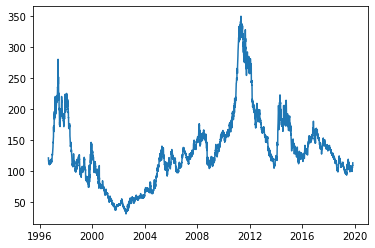

In [11]:
plt.plot(ts)

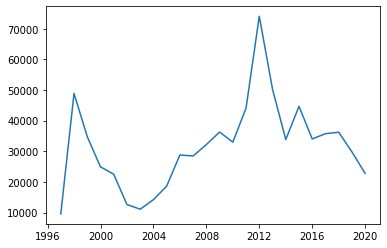

In [12]:
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

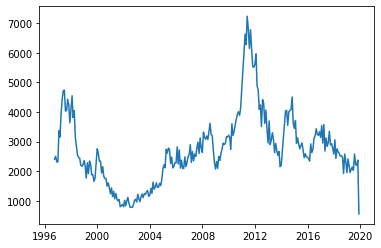

In [13]:
ts_mes = ts.resample('M').sum()
plt.plot(ts_mes)

In [14]:
#ERROR
#index = pd.PeriodIndex('Preço', freq='Q-JAN')

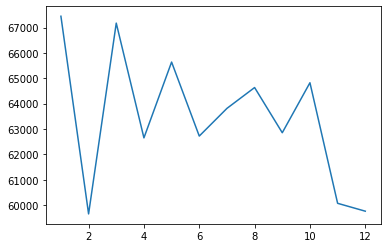

In [15]:
ts_mes2 = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes2)

In [16]:
#Fazendo a decomposição da série temporal
#ERROR
#decomposicao = seasonal_decompose(ts)

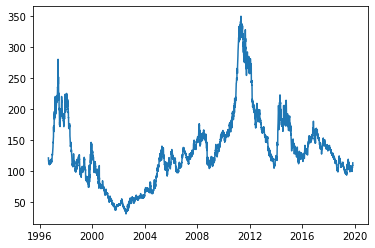

In [17]:
plt.plot(ts)

In [18]:
#ERROR
#decomposicao = seasonal_decompose(ts)

In [19]:
#acho que não foi possível e decomposição devido a série ser diária! 
#estudar mais sobre isso

In [20]:
#Rodando a previsão (até aqui usei o passo a passo da Udemy)
modelo_auto = auto_arima(ts, m = 15, seasonal = False, trace = True)
modelo_auto.summary()

Fit ARIMA: order=(2, 1, 2); AIC=28920.649, BIC=28960.614, Fit time=1.970 seconds
Fit ARIMA: order=(0, 1, 0); AIC=28965.408, BIC=28978.729, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=28964.294, BIC=28984.277, Fit time=0.079 seconds
Fit ARIMA: order=(0, 1, 1); AIC=28963.843, BIC=28983.826, Fit time=0.036 seconds
Fit ARIMA: order=(1, 1, 2); AIC=28933.959, BIC=28967.263, Fit time=0.698 seconds
Fit ARIMA: order=(3, 1, 2); AIC=28922.584, BIC=28969.209, Fit time=1.597 seconds
Fit ARIMA: order=(2, 1, 1); AIC=28930.995, BIC=28964.299, Fit time=0.709 seconds
Fit ARIMA: order=(2, 1, 3); AIC=28922.581, BIC=28969.206, Fit time=2.406 seconds
Fit ARIMA: order=(1, 1, 1); AIC=28961.982, BIC=28988.625, Fit time=2.196 seconds


C:\Users\mauro\AppData\Local\Continuum\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 3); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(3, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 10.396 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 5772
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14454.325
Method:                       css-mle   S.D. of innovations              2.960
Date:                Tue, 19 Nov 2019   AIC                          28920.649
Time:                        14:36:26   BIC                          28960.614
Sample:                             1   HQIC                         28934.555
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.038     -0.036      0.971      -0.075       0.072
ar.L1.D.y     -0.7958      0.093     -8.580      0.000      -0.978      -0.614
ar.L2.D.y     -0.6270      0.142     -4.421      0.000      -0.905      -0.349
ma.L1.D.y      0.7773      0.098      7.942      0.000       0.586       0.969
ma.L2.D.y      0.5549      0.152      3.655      0.000       0.257       0.853
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6346           -1.0919j            1.2629           -0.3338
AR.2           -0.6346           +1.0919j            1.2629            0.3338
MA.1           -0.7004           -1.1452j            1.3424           -0.3374
MA.2           -0.7004           +1.1452j            1.3424            0.3374
-----------------------------------------------------------------------------
"""

In [21]:
modelo = ARIMA(ts, order=(2, 1, 2))
modelo_treinado = modelo.fit()

C:\Users\mauro\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mauro\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [22]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Preço   No. Observations:                 5772
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14454.325
Method:                       css-mle   S.D. of innovations              2.960
Date:                Tue, 19 Nov 2019   AIC                          28920.649
Time:                        14:36:28   BIC                          28960.614
Sample:                             1   HQIC                         28934.555
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0013      0.038     -0.036      0.971      -0.075       0.072
ar.L1.D.Preço    -0.7958      0.093     -8.580      0.000      -0.978      -0.614
ar.L2.D.Preço    -0.6270      0.142     -4.421      0.000      -0.905      -0.349
ma.L1.D.Preço     0.7773      0.098      7.942      0.000       0.586       0.969
ma.L2.D.Preço     0.5549      0.152      3.655      0.000       0.257       0.853
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6346           -1.0919j            1.2629           -0.3338
AR.2           -0.6346           +1.0919j            1.2629            0.3338
MA.1           -0.7004           -1.1452j            1.3424           -0.3374
MA.2           -0.7004           +1.1452j            1.3424            0.3374
-----------------------------------------------------------------------------
"""

In [23]:
modelo = ARIMA(ts, order=(2, 1, 3))
modelo_treinado = modelo.fit()

C:\Users\mauro\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mauro\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [24]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Preço   No. Observations:                 5772
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -14454.290
Method:                       css-mle   S.D. of innovations              2.960
Date:                Tue, 19 Nov 2019   AIC                          28922.581
Time:                        14:36:31   BIC                          28969.206
Sample:                             1   HQIC                         28938.804
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0013      0.037     -0.036      0.971      -0.075       0.072
ar.L1.D.Preço    -0.8127      0.106     -7.680      0.000      -1.020      -0.605
ar.L2.D.Preço    -0.6345      0.145     -4.373      0.000      -0.919      -0.350
ma.L1.D.Preço     0.7927      0.106      7.444      0.000       0.584       1.001
ma.L2.D.Preço     0.5599      0.154      3.642      0.000       0.259       0.861
ma.L3.D.Preço    -0.0045      0.017     -0.263      0.792      -0.038       0.029
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6404           -1.0797j            1.2554           -0.3352
AR.2           -0.6404           +1.0797j            1.2554            0.3352
MA.1           -0.7070           -1.1253j            1.3289           -0.3393
MA.2           -0.7070           +1.1253j            1.3289            0.3393
MA.3          126.4588           -0.0000j          126.4588           -0.0000
-----------------------------------------------------------------------------
"""

In [25]:
modelo = ARIMA(ts, order=(2, 2, 3))
modelo_treinado = modelo.fit()
modelo_treinado.summary()

C:\Users\mauro\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mauro\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Preço   No. Observations:                 5771
Model:                 ARIMA(2, 2, 3)   Log Likelihood              -14457.590
Method:                       css-mle   S.D. of innovations              2.961
Date:                Tue, 19 Nov 2019   AIC                          28929.181
Time:                        14:36:40   BIC                          28975.805
Sample:                             2   HQIC                         28945.404
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.989e-06   3.61e-05     -0.166      0.868   -7.67e-05    6.48e-05
ar.L1.D2.Preço    -0.8595      0.068    -12.618      0.000      -0.993      -0.726
ar.L2.D2.Preço    -0.7675      0.110     -6.959      0.000      -0.984      -0.551
ma.L1.D2.Preço    -0.1553      0.074     -2.101      0.036      -0.300      -0.010
ma.L2.D2.Preço    -0.1350      0.087     -1.559      0.119      -0.305       0.035
ma.L3.D2.Preço    -0.7081      0.123     -5.776      0.000      -0.948      -0.468
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5599           -0.9947j            1.1414           -0.3316
AR.2           -0.5599           +0.9947j            1.1414            0.3316
MA.1            1.0007           -0.0000j            1.0007           -0.0000
MA.2           -0.5956           -1.0279j            1.1880           -0.3336
MA.3           -0.5956           +1.0279j            1.1880            0.3336
-----------------------------------------------------------------------------
"""

In [26]:
modelo = ARIMA(ts, order=(2, 1, 2))
modelo_treinado = modelo.fit()
modelo_treinado.summary()

C:\Users\mauro\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mauro\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Preço   No. Observations:                 5772
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14454.325
Method:                       css-mle   S.D. of innovations              2.960
Date:                Tue, 19 Nov 2019   AIC                          28920.649
Time:                        14:36:43   BIC                          28960.614
Sample:                             1   HQIC                         28934.555
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0013      0.038     -0.036      0.971      -0.075       0.072
ar.L1.D.Preço    -0.7958      0.093     -8.580      0.000      -0.978      -0.614
ar.L2.D.Preço    -0.6270      0.142     -4.421      0.000      -0.905      -0.349
ma.L1.D.Preço     0.7773      0.098      7.942      0.000       0.586       0.969
ma.L2.D.Preço     0.5549      0.152      3.655      0.000       0.257       0.853
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6346           -1.0919j            1.2629           -0.3338
AR.2           -0.6346           +1.0919j            1.2629            0.3338
MA.1           -0.7004           -1.1452j            1.3424           -0.3374
MA.2           -0.7004           +1.1452j            1.3424            0.3374
-----------------------------------------------------------------------------
"""

In [27]:
previsoes = modelo_treinado.forecast(steps = 7)

In [28]:
previsoes

(array([113.33752716, 113.26324662, 113.24541392, 113.30292802,
        113.26508778, 113.25588566, 113.28368278]),
 array([2.96024889, 4.14798318, 4.9688603 , 5.75582906, 6.43473621,
        7.01478574, 7.58203386]),
 array([[107.53554596, 119.13950836],
        [105.13334898, 121.39314427],
        [103.50662669, 122.98420115],
        [102.02171037, 124.58414568],
        [100.65323655, 125.876939  ],
        [ 99.50715826, 127.00461307],
        [ 98.42316949, 128.14419607]]))

In [29]:
previsoes = modelo_treinado.forecast(steps = 7)[0]
print(previsoes)

[113.33752716 113.26324662 113.24541392 113.30292802 113.26508778
 113.25588566 113.28368278]


In [30]:
#ERROR
#eixo = ts.plot()
#modelo_treinado.plot_predict(start='5760', end='5780', ax = eixo, plot_insample=True)
#o código apresenta erro devido a série possuir datas ausentes - SAB e DOM
#assim ela não consegue prever o dia de amanhã, uma vez que este pode não existir!

In [31]:
#ERROR
#train1_reindex = train1.reindex (pd.DatetimeIndex ( start = train1.date [ 0 ], final = train1.date [ - 1 ], freq = ' D ' ))

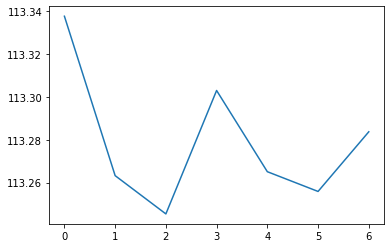

In [32]:
plt.plot(previsoes)

In [33]:
#VOU TENTAR FAZER UM RESAMPLING DO MEU CONJUNTO 'ts' TRANSFORMANDO-O EM UMA ´SERIE FIXA DE ACORDO COM PÁGINA 404
resampler = ts.resample('D')

In [34]:
#ERROR
#resampler.head(5)

In [35]:
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [36]:
#ERROR
#ex = resampler.plot()

### MODIFICAÇÕES DE ACORDO COM RECOMENDAÇÕES ARTIGO UDEMY

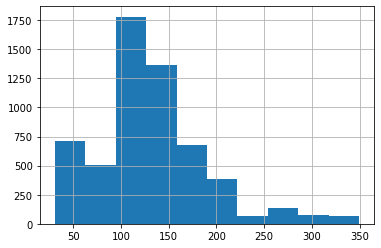

In [38]:
ts.hist()

TESTE DE RAIZ UNITÁRIA - DICKEY FULLER
* Valor p> 0,05 : falha ao rejeitar a hipótese nula (H0), os dados têm uma raiz unitária e não são estacionários.
* Valor de p <= 0,05 : Rejeita a hipótese nula (H0), os dados não possuem uma raiz unitária e são estacionários.

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
result = adfuller(ts)

In [43]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.905535
p-value: 0.329462
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


#### Criar um conjunto de treino e outro de teste para rodar os modelos

In [45]:
#divide o conjunto de dados
train = ts[:int(0.7*(len(ts)))]
valid = ts[int(0.7*(len(ts))):]

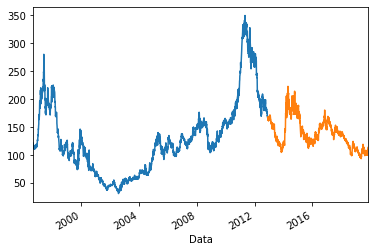

In [48]:
#plotar os conjuntos de dados
train.plot() #vai de 1996 até 2012
valid.plot() #vai de 2013 até 2019

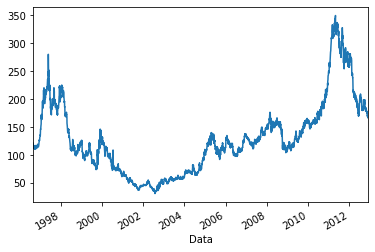

In [49]:
train.plot()

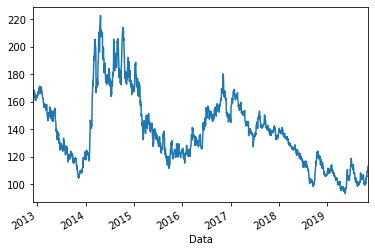

In [51]:
valid.plot()

Construindo o modelo novo

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=20537.253, BIC=20575.077, Fit time=1.278 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=20571.336, BIC=20583.944, Fit time=0.059 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=20567.690, BIC=20586.602, Fit time=0.223 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=20566.651, BIC=20585.563, Fit time=0.284 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=20541.695, BIC=20573.215, Fit time=0.725 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=20537.801, BIC=20581.929, Fit time=3.030 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=20539.439, BIC=20570.959, Fit time=1.339 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=20537.535, BIC=20581.663, Fit time=2.407 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=20561.725, BIC=20586.941, Fit time=0.659 seconds
Fit ARIMA: order=(3

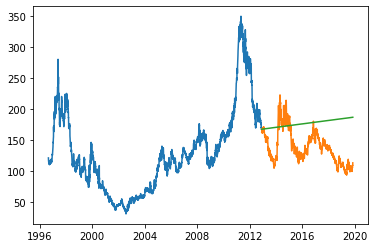

In [65]:
#Construindo o novo modelo
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid + 7))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [66]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

48.359125126094625


In [67]:
forecast

,Prediction
Data,
2012-11-30,167.362301
2012-12-03,167.482784
2012-12-04,167.409208
2012-12-05,167.420473
2012-12-06,167.470715
2012-12-07,167.458282
2012-12-10,167.465397
2012-12-11,167.489811
2012-12-12,167.494794


In [68]:
train.describe()

count    4041.000000
mean      128.949349
std        66.136399
min        30.920000
25%        75.950000
50%       117.660000
75%       159.760000
max       349.390000
Name: Preço, dtype: float64

In [69]:
valid.describe()

count    1732.000000
mean      138.656819
std        26.066929
min        93.380000
25%       119.422500
50%       135.650000
75%       154.017500
max       222.650000
Name: Preço, dtype: float64

In [70]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [71]:
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')

C:\Users\mauro\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

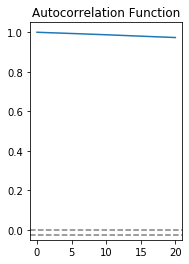

In [72]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4041
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -10262.626
Date:                Tue, 19 Nov 2019   AIC                          20537.253
Time:                        15:52:36   BIC                          20575.077
Sample:                             0   HQIC                         20550.653
                               - 4041                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0229      0.095      0.242      0.808      -0.162       0.208
ar.L1         -0.5999      0.078     -7.648      0.000      -0.754      -0.446
ar.L2         -0.4631      0.078     -5.908      0.000      -0.617      -0.309
ma.L1          0.5674      0.083      6.850      0.000       0.405       0.730
ma.L2          0.3726      0.083      4.465      0.000       0.209       0.536
sigma2         9.4172      0.102     92.471      0.000       9.218       9.617
===================================================================================
Ljung-Box (Q):                       47.83   Jarque-Bera (JB):              7920.56
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -0.31
Prob(H) (two-sided):                  0.03   Kurtosis:                         9.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

OBSERVAÇÕES ACERCA DO MODELO CONSTRUÍDO
* O erro RMSE está muito alto, 
* Comparando o modelo 